In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import cvxpy as cp
import math
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

## Import and Clean Data

In [54]:
mast_dem_df = pd.read_csv("/Users/wesle/OneDrive/Senior Year/Thesis/mast_dem.csv")

makes = mast_dem_df["Make and Model"].to_list()
quarters = list(mast_dem_df.columns.values)
quarters.remove("Make and Model")

q_num = np.linspace(0, 95, 96)
q_vect = q_num.reshape(96, 1)

dem_df = mast_dem_df.drop(columns=['Make and Model'])
dem_arr_all = dem_df.to_numpy()

In [55]:
mast_dem_leftshift = pd.read_csv("/Users/wesle/OneDrive/Senior Year/Thesis/mast_dem_left_shift.csv")
quarter_count = mast_dem_leftshift['Quarter Count'].to_numpy()

In [56]:
dem_arr = dem_arr_all[1:dem_arr_all.shape[0]]
agg_dem = dem_arr_all[0]

In [57]:
years = np.linspace(1999, 2022.75, 96)
years

array([1999.  , 1999.25, 1999.5 , 1999.75, 2000.  , 2000.25, 2000.5 ,
       2000.75, 2001.  , 2001.25, 2001.5 , 2001.75, 2002.  , 2002.25,
       2002.5 , 2002.75, 2003.  , 2003.25, 2003.5 , 2003.75, 2004.  ,
       2004.25, 2004.5 , 2004.75, 2005.  , 2005.25, 2005.5 , 2005.75,
       2006.  , 2006.25, 2006.5 , 2006.75, 2007.  , 2007.25, 2007.5 ,
       2007.75, 2008.  , 2008.25, 2008.5 , 2008.75, 2009.  , 2009.25,
       2009.5 , 2009.75, 2010.  , 2010.25, 2010.5 , 2010.75, 2011.  ,
       2011.25, 2011.5 , 2011.75, 2012.  , 2012.25, 2012.5 , 2012.75,
       2013.  , 2013.25, 2013.5 , 2013.75, 2014.  , 2014.25, 2014.5 ,
       2014.75, 2015.  , 2015.25, 2015.5 , 2015.75, 2016.  , 2016.25,
       2016.5 , 2016.75, 2017.  , 2017.25, 2017.5 , 2017.75, 2018.  ,
       2018.25, 2018.5 , 2018.75, 2019.  , 2019.25, 2019.5 , 2019.75,
       2020.  , 2020.25, 2020.5 , 2020.75, 2021.  , 2021.25, 2021.5 ,
       2021.75, 2022.  , 2022.25, 2022.5 , 2022.75])

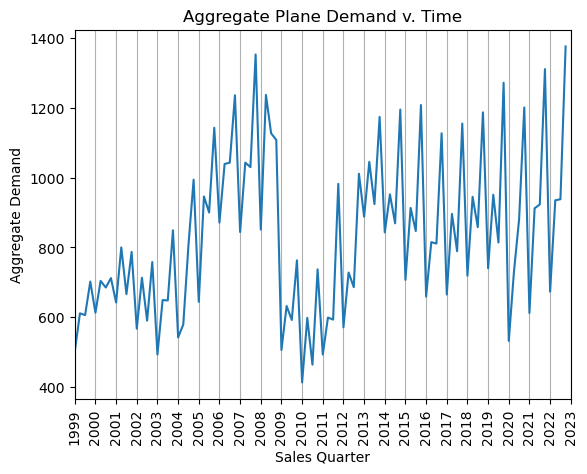

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.plot(years, agg_dem)
ax.xaxis.grid(which='major')
ax.set_xlabel("Sales Quarter")
ax.set_ylabel("Aggregate Demand")
ax.set_xlim(1999, 2023)
ax.set_title("Aggregate Plane Demand v. Time")
ax.tick_params(axis='x', labelrotation=90)

In [59]:
## Determine first and last sales quarter for each plane
start_q = np.zeros(dem_arr.shape[0])
for p in range(0, start_q.shape[0]):
    plane_dem = dem_arr[p]
    i = 0
    while plane_dem[i] < 1:
        start_q[p] += 1
        i += 1
        if i == 96: break

end_q = np.zeros(dem_arr.shape[0])
for p in range(0, dem_arr.shape[0]):
    plane_dem = dem_arr[p]
    end_q[p] = 95
    i = 95
    while plane_dem[i] < 1:
        end_q[p] -= 1
        i -= 1
        if i == 0: break

In [60]:
unemployment_rate_df = pd.read_csv("/Users/wesle/OneDrive/Senior Year/Thesis/unemployment_rate.csv")
unemployment_rate = unemployment_rate_df.to_numpy()[0]

jet_fuel_df = pd.read_csv("/Users/wesle/OneDrive/Senior Year/Thesis/jet_fuel_prices.csv")
jet_fuel = jet_fuel_df.to_numpy()[0]

In [73]:
corr_unem = np.corrcoef(agg_dem, unemployment_rate)
corr_jf = np.corrcoef(agg_dem, jet_fuel)
print("Aggregate Demand - Unemployment Correlation =", corr_unem[0][1])
print("Aggregate Demand - Jet Fuel Correlation =", corr_jf[0][1])

Aggregate Demand - Unemployment Correlation = -0.30467451118009675
Aggregate Demand - Jet Fuel Correlation = 0.37360084371551067


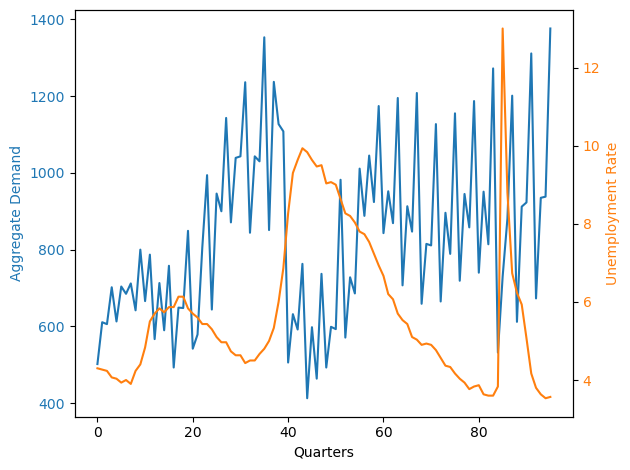

In [61]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Quarters')
ax1.set_ylabel('Aggregate Demand', color=color)
ax1.plot(q_num, agg_dem, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Unemployment Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(q_num, unemployment_rate, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

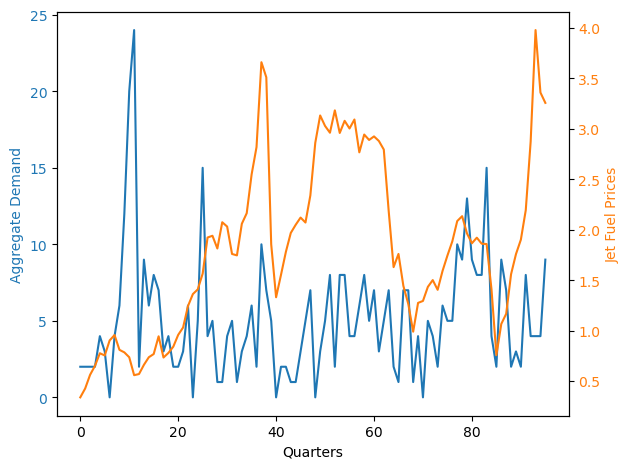

In [62]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Quarters')
ax1.set_ylabel('Aggregate Demand', color=color)
ax1.plot(q_num, dem_arr[0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'
ax2.set_ylabel('Jet Fuel Prices', color=color)  # we already handled the x-label with ax1
ax2.plot(q_num, jet_fuel, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [63]:
unemployment_corr = np.corrcoef(agg_dem, unemployment_rate)[0,1]
jetfuel_corr = np.corrcoef(agg_dem, jet_fuel)[0,1]

In [64]:
delta_unemployment = np.zeros(dem_arr.shape[1])
delta_jetfuel = np.zeros(dem_arr.shape[1])

for i in range(1, dem_arr.shape[1]):
    delta_unemployment[i] = unemployment_rate[i] - unemployment_rate[i-1]
    delta_jetfuel[i] = jet_fuel[i] - jet_fuel[i-1]

## Run the causal model

In [65]:
def causal_model(plane, showPlots, MASE_dist):
    #############################
    forecast_range = MASE_dist
    #############################

    ## Generate parameters for optimization
    start = int(start_q[plane])
    end = int(end_q[plane])
    n = end - start + 1
    y = dem_arr[plane]

    y_hist = np.zeros(n - forecast_range)
    u_s = np.zeros(n - forecast_range)
    j_s = np.zeros(n - forecast_range)
    y_act = np.zeros(n - forecast_range)

    for i in range(0, n - forecast_range):
        y_hist[i] = y[i + start]
        u_s[i] = unemployment_rate[i + forecast_range + start] - unemployment_rate[i + start]
        j_s[i] = jet_fuel[i + forecast_range + start] - jet_fuel[i + start]
        y_act[i] = y[i + forecast_range + start]


    ## Optimize Forecast
    alpha = cp.Variable()
    beta = cp.Variable()

    mu = y_hist + (alpha*u_s) + (beta*j_s)

    objective = cp.Minimize((1/(n-forecast_range)) * cp.sum_squares(mu - y_act))
    problem = cp.Problem(objective)
    solution = problem.solve()
    alpha_opt = alpha.value
    beta_opt = beta.value
    mu_opt = y_hist + alpha_opt*u_s + beta_opt*j_s


    ## Compute average error of naive forecast
    error_naive = np.zeros(n - MASE_dist)
    for t in range(int(start_q[plane]), int(end_q[plane]) - MASE_dist):
        error_naive[t - int(start_q[plane])] = np.abs(y[t + MASE_dist] - y[t])

    MAE = np.sum(error_naive)/(error_naive.shape[0])


    ## Compute MASE
    error_fore = np.zeros(8)
    scaled_error = np.zeros(8)
    percent_error = np.zeros(8)
    zero_dem_ind = 0
    for t in range(0, 8):
        error_fore[t] = np.abs(mu_opt[t + (n-forecast_range-16)] - y_act[t + (n-forecast_range-16)])
        scaled_error[t] = error_fore[t]/MAE
        if (y_act[t + (n-forecast_range-16)] > 0):
            percent_error[t] = 100 * error_fore[t] / y_act[t + (n-forecast_range-16)]
        if (y_act[t + (n-forecast_range-16)] == 0):
            zero_dem_ind = 1

    MASE = np.average(scaled_error)
    MAPE = 0
    if (zero_dem_ind == 0):
        MAPE = np.average(percent_error)
    if (zero_dem_ind == 1):
        MAPE = -1

    ## Plot optimal forecast
    if (showPlots):
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.plot(q_num[int(start_q[plane]):int(end_q[plane]) + 1 - forecast_range], y_act, label="Actual Demand")
        ax.plot(q_num[int(start_q[plane]):int(end_q[plane]) + 1 - forecast_range], mu_opt, label="Forecasted Demand")
        ax.legend()
        ax.grid(axis='x', alpha = 0.5)
        ax.set_xlim(0, 96)
        ax.xaxis.set_major_locator(MultipleLocator(4))
        ax.xaxis.set_minor_locator(AutoMinorLocator(1))
        ax.set_xlabel("Quarter")
        ax.set_ylabel("Demand")
        ax.set_title(makes[plane + 1])

    return MASE, MAPE

In [79]:
def naive_model(plane, MASE_dist):
    #############################
    forecast_range = MASE_dist
    #############################

    ## Generate parameters for optimization
    start = int(start_q[plane])
    end = int(end_q[plane])
    n = end - start + 1
    y = dem_arr[plane]


    ## Compute average error of naive forecast
    error_naive = np.zeros(n - MASE_dist)
    dem_inrange = np.zeros(n - MASE_dist)
    for t in range(int(start_q[plane]), int(end_q[plane]) - MASE_dist):
        error_naive[t - int(start_q[plane])] = np.abs(y[t + MASE_dist] - y[t])
        dem_inrange[t - int(start_q[plane])] = y[t]

    MAE = np.average(error_naive)
    avg_dem = np.average(dem_inrange)

    return MAE, avg_dem

In [67]:
causal_output = pd.DataFrame(columns=['Plane', 'MASE 1', 'MASE 2', 'MASE 3', 'MASE 4', 'MAPE 1', 'MAPE 2', 'MAPE 3', 'MAPE 4'])
plane_count = 186
causal_output['Plane'] = makes[1:plane_count+1]

mase1 = np.zeros(plane_count)
mase2 = np.zeros(plane_count)
mase3 = np.zeros(plane_count)
mase4 = np.zeros(plane_count)

mape1 = np.zeros(plane_count)
mape2 = np.zeros(plane_count)
mape3 = np.zeros(plane_count)
mape4 = np.zeros(plane_count)

for p in range(0, plane_count):
    mase1[p] = causal_model(p, False, 1)[0]
    mase2[p] = causal_model(p, False, 2)[0]
    mase3[p] = causal_model(p, False, 3)[0]
    mase4[p] = causal_model(p, False, 4)[0]
    mape1[p] = causal_model(p, False, 1)[1]
    mape2[p] = causal_model(p, False, 2)[1]
    mape3[p] = causal_model(p, False, 3)[1]
    mape4[p] = causal_model(p, False, 4)[1]

In [68]:
causal_output['MASE 1'] = mase1
causal_output['MASE 2'] = mase2
causal_output['MASE 3'] = mase3
causal_output['MASE 4'] = mase4

causal_output['MAPE 1'] = mape1
causal_output['MAPE 2'] = mape2
causal_output['MAPE 3'] = mape3
causal_output['MAPE 4'] = mape4

causal_output.to_csv("/Users/wesle/OneDrive/Senior Year/Thesis/Code/causal_model_output.csv")

In [80]:
mae_output = pd.DataFrame(columns=['Plane', 'Avg Dem', 'MAE 1', 'MAE 2', 'MAE 3', 'MAE 4'])
mae_output['Plane'] = makes[1:plane_count+1]
plane_count = 186
mae1 = np.zeros(plane_count)
mae2 = np.zeros(plane_count)
mae3 = np.zeros(plane_count)
mae4 = np.zeros(plane_count)
avg_dem = np.zeros(plane_count)

for p in range(0, plane_count):
    mae1[p] = naive_model(p, 1)[0]
    mae2[p] = naive_model(p, 2)[0]
    mae3[p] = naive_model(p, 3)[0]
    mae4[p] = naive_model(p, 4)[0]
    avg_dem[p] = (naive_model(p, 1)[1] + naive_model(p, 2)[1] + naive_model(p, 3)[1] + naive_model(p, 4)[1])/4

mae_output['Avg Dem'] = avg_dem
mae_output['MAE 1'] = mae1
mae_output['MAE 2'] = mae2
mae_output['MAE 3'] = mae3
mae_output['MAE 4'] = mae4
print(mae_output)

                         Plane    Avg Dem      MAE 1      MAE 2      MAE 3  \
0           PA-44-180 Seminole   5.069499   3.200000   3.914894   3.741935   
1                        PC-12  18.616530  10.264368  10.744186  10.811765   
2         PA-28-181 Archer III  13.472343   5.968421   6.702128   6.956989   
3          PA-34-220T Seneca V   5.114755   3.057471   2.802326   3.435294   
4                   DA40 (All)  27.376603  11.388060   9.303030  13.230769   
..                         ...        ...        ...        ...        ...   
181                   MT-7-235   1.074883   1.360000   1.416667   1.000000   
182            206H Stationair   2.183346   1.750000   2.000000   1.388889   
183       PA-32-301FT Piper 6X   4.422447   1.312500   2.133333   2.571429   
184   Beechcraft King Air B200   8.098195   6.105263   5.500000   8.294118   
185  Beechcraft King Air C90GT   8.716020   4.894737   6.000000   7.588235   

         MAE 4  
0     3.673913  
1     4.583333  
2     7.2065